Past data tells you that the probability of a car stopping at a traffic light intersection is P(A)=0.40.


You also know that the past probability of a traffic light being yellow (as opposed to red or green) is P(B)=0.10.

When a car is stopped at an intersection, data shows that 12% of the time the light is yellow. So if we know a car is stopped, there's a 12% chance the light is yellow. This is called a conditional probability. If the traffic light is yellow, what is the chance that the car will stop?

In [1]:
p_A = 0.40
p_notA = 1 - p_A

p_B_given_A = 0.12
p_notB_given_A = 1 - p_B_given_A

# P(B|-A) = ???
# P(-B|-A)= ???

p_B = 0.10
p_notB = 1 - p_B

p_A_given_B = (p_B_given_A * p_A)/(p_B)
p_notA_given_B = 1 - p_A_given_B

p_A_given_B

0.48

On a four-lane highway, cars are either going fast or not fast. Faster cars should go in the leftmost lanes.

At any given time, 20% of cars are in the left-most lane.

Overall, 40% of cars on the highway are classified as going fast.

Out of all the cars in the leftmost lane, 90% are going fast.


Given the above information, if a car is going fast, what is the probability that it will be in the leftmost lane?

In [7]:
# Left lane
p_A = .2
p_notA = 1 - p_A

# Fast
p_B = .4
p_notB = 1 - p_B

p_B_given_A = .9
p_notB_given_A = 1 - p_B_given_A

p_A_given_B = (p_B_given_A * p_A)/(p_B)
p_notA_given_B = 1 - p_A_given_B

p_A_given_B

0.45

# Uniform Probability Distribution Function

The probability_uniform function calculates the probability of an event
given a range of values from a uniform continuous probability distribution. 

- low_range is the low end of the region of interest

- high_range is the high end of the region of interest

- minimum is the minimum value of the uniform probability 
  distribution (0 for a spinning wheel)

- maximum is the maximum value of the uniform probability 
  distribution (360 for a spinning wheel).


In [1]:
def probability_uniform(low_range, high_range, minimum, maximum):
    
    ## TODO: Calculate the probability of an event occurring 
    ## between low_range and high_range.
    ## Assume the user has given valid inputs such that low_range < high_range.
    ##   minimum < maximum
    ##

    total_range = maximum - minimum
    desired_range = high_range - low_range
    probability = desired_range/total_range
    
    return probability
    

## TODO: Test your results by running this cell.
## If the cell produces no output, your answer was as expected

assert "{0:.2f}".format(probability_uniform(15, 305, 0, 360)) == '0.81'
assert "{0:.2f}".format(probability_uniform(1, 5, 0, 10)) == '0.40'

# Improving Your Code

### Skills in this Excercise
* Checking for incorrect inputs
* Improving functions for edge cases
* Debugging

### Improving Your Function

Your `probability_uniform` function should work at this point. But, you might run into a couple of problems. 

1. What happens if you call your function like this: `probability_range(35, 20, 0, 360)` ?
2. What happens if you input an angle that is outside the possibilities of the bottle's possible outcomes like probability_range(-25, 390, 0, 360)?
3. What if you call your function like this: probability_range('a', 'b', 0, 360)?

When writing functions, it's important to think of edge cases or incorrect user input. 

Here are three more task to help deal with these situations:
* Make sure the function outputs a valid probability when low_range is greater than high_range. Hint: there is more than one way to do this: 
  * For example, using absolute value
 * comparing low_range and high_range  to see which one is greater
* Check the inputs to the function to make sure they are not strings. If the user inputted a string, the function should return None. Optionally, print out a message to the user as well explaining why the function put out None. This exercise might seem trivial, but if you try to do something like `'my_string'/2` in python, you will get an error. Debugging the errors and avoiding them is a key programming skill. 
* Check that the user has only inputted low_range and high_range values that are in between minimum and maximum. If an input is out of the allowed range, return None. Optionally, print out a message to the user as well explaining why the function put out None.

Write a function called `probability_range_improved` that takes into account these three tasks.

In [2]:
def probability_range_improved(low_range, high_range, minimum, maximum):

    # TODO: check if any of the inputs are strings.
    # hint: the python function isinstance() will be useful
    for num in low_range, high_range, minimum, maximum:
        if isinstance(num, str):
            # print a message to the user and return none
            print('Inputs should be numbers not string')
            return None
    
    # TODO check that low_range is between minimum and maximum
    if low_range < minimum or low_range > maximum:
        # print a message to the user and return none
        print('Your low range value must be between minimum and maximum')
        return None
        
    # check that high_range is between min and max
    if high_range < minimum or high_range > maximum:
        # print a message to the user and return none
        print('The high range value must be between minimum and maximum')
        return None

    # TODO: calulate and return the probability 
    # even if low range is greater than high range
    total_range = abs(maximum - minimum)
    desired_range = abs(high_range - low_range)
    probability = desired_range/total_range
    return probability


assert probability_range_improved('a', 0, -100, 500) == None
assert probability_range_improved(-100, 300, 100, 500) == None
assert probability_range_improved(105, 700, 100, 500) == None
assert "{0:.2f}".format(probability_range_improved(25, 700, 5, 800)) == '0.85'
assert "{0:.2f}".format(probability_range_improved(700, 25, 5, 800)) == '0.85'

Inputs should be numbers not string
Your low range value must be between minimum and maximum
The high range value must be between minimum and maximum


Populating the interactive namespace from numpy and matplotlib


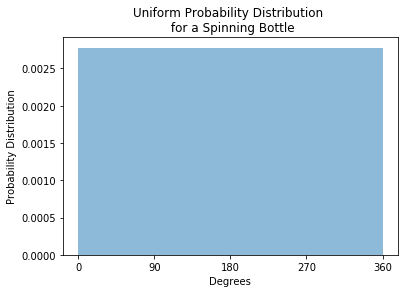

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
%pylab inline

def plot_uniform(x_minimum, x_maximum, tick_interval):
        
    # TODO: Using x_maximum and x_minimum, calculate the height of the
    # rectangle that represents the uniform probability distribution
    # Recall that the rectangle area should be 1 for a uniform continuous
    # distribution 
    x = range(x_minimum, x_maximum + 1)
    y = 1/(x_maximum - x_minimum)
    
    plt.bar(x_minimum, y, bottom=0, width= (x_maximum - x_minimum), align='edge', alpha=0.5)
    plt.xlabel('Degrees')
    plt.ylabel('Probability Distribution')
    plt.title('Uniform Probability Distribution \n for a Spinning Bottle')
    plt.xticks(np.arange(min(x), max(x)+1, .25*x_maximum//tick_interval))
    plt.show()
    
plot_uniform(0, 360, 1)

# Visualizing a discrete distribution

Here is an example input and output:
- a vehicle accident is 5 times more likely from 5am to 10am versus midnight to 5am. 
- a vehicle accident is 3 times more likely from 10am to 4pm versus midnight to 5am.
- a vehicle accident is 6 times more likely from 4pm to 9pm versus midnight to 5am.
- a vehicle accident is 1/2 as likely from 9pm to midnight versus midnight to 5am.

The probability of getting in an accident on any given day is .05

The inputs would look like this.  For the hours, you can use 24 hour time:

hour_intervals = [0, 5, 10, 16, 21, 24]

relative_probabilities = [1, 5, 3, 6, 0.5]

total_probability = 0.05

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def bar_heights(intervals, probabilities, total_probability):

    heights = []
    
    #TODO: sum the relative probabilities
    total_relative_prob = sum(probabilities)
    
    for i in range(0, len(probabilities)):
        
        #TODO: Looping through the probabilities list, 
        #      take one probability at a time and 
        #      calculate the area of each bar. Think about how you can 
        #      calculate the area of a bar knowing the total_probability,
        #      relative probability, and the sum of the relative probabilities
        bar_area = probabilities[i]/total_relative_prob
        
        # TODO: Calculate the height of the bar and append the value to the
        # heights list.Remember that the area of each bar 
        # is the width of the bar times the height of the bar
        bar_width = (intervals[i+1] - intervals[i])
        heights.append(bar_area/bar_width)
        
    return heights

In [27]:
# Run to test
print(bar_heights([0, 5, 10, 16, 21, 24], [1, 5, 3, 6, 0.5], 0.05))

[0.012903225806451613, 0.06451612903225806, 0.03225806451612903, 0.07741935483870968, 0.01075268817204301]


### Visualize Results

Once the bar_heights function is working, here is some code to visualize your results.

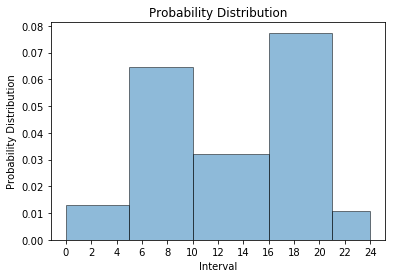

In [31]:
hour_intervals = [0, 5, 10, 16, 21, 24]
probability_intervals = [1, 5, 3, 6, 1/2]
accident_probability = 0.05

heights = bar_heights(hour_intervals, probability_intervals, accident_probability)
freqs = np.array(heights)
bins = np.array(hour_intervals)
widths = bins[1:] - bins[:-1]
freqs = freqs.astype(np.float)

widths = bins[1:] - bins[:-1]

tick_interval = 2
plt.bar(bins[:-1], freqs, width=widths, align='edge', edgecolor='black', alpha=0.5)
plt.xlabel('Interval')
plt.ylabel('Probability Distribution')
plt.title('Probability Distribution')
plt.xticks(np.arange(min(bins), max(bins)+1, tick_interval))

plt.show()

Let's say babies are twice as likely to be born in the AM vs. PM.

Let *a* be the height of AM, and *b* be the height of PM.

b = 1/3 * 1/12 = 1/36
a = 2/3 * 1/12 = 1/18

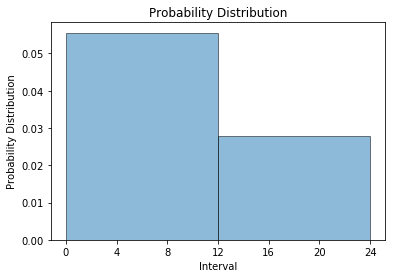

In [25]:
hour_intervals = [0, 12, 24]
probability_intervals = [2,1]
accident_probability = 1

heights = bar_heights(hour_intervals, probability_intervals, accident_probability)
freqs = np.array(heights)
bins = np.array(hour_intervals)
widths = bins[1:] - bins[:-1]
freqs = freqs.astype(np.float)

widths = bins[1:] - bins[:-1]

tick_interval = 4
plt.bar(bins[:-1], freqs, width=widths, align='edge', edgecolor='black', alpha=0.5,)
plt.xlabel('Interval')
plt.ylabel('Probability Distribution')
plt.title('Probability Distribution')
plt.xticks(np.arange(min(bins), max(bins)+1, tick_interval))

plt.show()

Notice that the first  bar has exactly twice the area of the 2nd bar.

In [24]:
1/18, 1/36

(0.05555555555555555, 0.027777777777777776)

In [42]:
import scipy.stats as st

grades = st.zscore([1,6,3,7,6,1,3,2,7,2])

grades = [round(i,1) for i in grades]
grades

[-1.2,
 1.0,
 -0.29999999999999999,
 1.3999999999999999,
 1.0,
 -1.2,
 -0.29999999999999999,
 -0.80000000000000004,
 1.3999999999999999,
 -0.80000000000000004]

# Determining location of a robot

Less about probability, more about object-oriented programming.

In [34]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np

class SelfDrivingCar():
    def __init__(self, rows, columns):
        
        # initializes a map as a list
        self.grid = []

        ### TODO:
        # initialize variables
        # self.grid_size is a list containing the number of rows
        # and number of columns in the grid like [10,3]. Use the rows and 
        # columns input variables to define self.grid_size
        self.grid_size = [rows, columns]
        
        ### TODO: 
        # store the total number of elements in the grid. The number
        # of elements would be the rows * columns
        self.num_elements = rows * columns
        
    ### TODO:
    # write the function that initializes the grid. Remember that
    # when the robot turns on, it has no idea where it is. So if there
    # are 25 points on the grid, the initial probability of each point
    # is 1/25.
    # You will create a 2-D map using a python list. This can be
    # a bit tricky, and you might have to search online for how to
    # program a 2-D list in python. A 2-D list will need a for loop
    # within a for loop
    
    def initialize_grid(self):
        
        ### TODO: 
        # calculate the probability of being at any element on the grid
        # you can use the self.num_elements variable you defined in the
        # __init__ function
        probability = 1/self.num_elements
        
        ### TODO:
        # write a for loop to fill out the 2-D map with the value in the
        # probability variable. For example, if the map has 25 points,
        # the map should be initialized to map[0,0] = 0.04 
        # map[0,1] = 0.04
        # map[0, 2] = 0.04
        # etc.
        # python''s list.append() functionality might be helpful
        ### 
        self.grid = np.zeros(self.grid_size)
        self.grid.fill(probability)
        
        return self.grid
    
    def output_probability(self, grid_point):
        
        ### TODO:
        # Given a point on the grid, such as [0,4] return the
        # current probability at that point.
        # You will need to use the self.map variable and combine it
        # with the grid_point and then return the probability
        return self.grid[grid_point[0], grid_point[1]]
    
    def update_probability(self, update_list):
        
        #### TODO:
        # Given a list of grid_points and new probabilities, 
        # update the probabilities of the grid points.
        # Here is an example input to this function
        # [[3,4,.01], [4,5,.02], [0, 1, .02]]
        # This means first update grid point (3,4) to have probability 0.01
        # Then update grid point (4,5) to have probability 0.02
        # Finally update grid point (0, 1) to have probability 0.02.
        # Your function will be updating the elements in the self.map variable
        for row, col, val in update_list:
            self.grid[row, col] = val
        
        return self.grid
            
    def visualize_probability(self):
        # this function is given so that you can visualize the results.
        # There is no need to change anything.

        # this line of code ensures TEST RUN button does not produce an error
        # if self.grid is empty.
        try:
            plt.imshow(self.grid, cmap='Greys', clim=(0,.1))
            plt.title('Heat Map of Grid Probabilities')
            plt.xlabel('grid x axis')
            plt.ylabel('grid y axis')
            plt.show()
        except:
            plt.imshow([0,0], cmap='Greys', clim=(0,.1))
            plt.title('Heat Map of Grid Probabilities')
            plt.xlabel('grid x axis')
            plt.ylabel('grid y axis')
            plt.show()

0.05
0.05
0.2
0.1


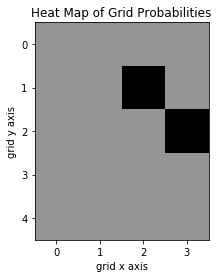

In [35]:
car = SelfDrivingCar(5,4)

car.initialize_grid()

# should output 0.05
print(car.output_probability([2,3]))

# should output 0.05
print(car.output_probability([1,2]))

car.update_probability([[2,3,.2], [1,2,.1]])

# # should output 0.2
print(car.output_probability([2,3]))

# # should output 0.1
print(car.output_probability([1,2]))

# # should output a heat map
car.visualize_probability()

In [18]:
#Modify the code below so that the function sense, which 
#takes p and Z as inputs, will output the NON-normalized 
#probability distribution, q, after multiplying the entries 
#in p by pHit or pMiss according to the color in the 
#corresponding cell in world.


p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
Z = 'red'
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    #
    #ADD YOUR CODE HERE
    q=[]
    for i, col in enumerate(world):
        if col == Z:
            q.append(p[i]*pHit)
        else:
            q.append(p[i]*pMiss)
    
    total_prob = sum(q)
    q = [float(i)/total_prob for i in q]
    return q

print (sense(p,Z))

[0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111]


In [24]:
#Modify the code below so that the function sense, which 
#takes p and Z as inputs, will output the NON-normalized 
#probability distribution, q, after multiplying the entries 
#in p by pHit or pMiss according to the color in the 
#corresponding cell in world.


p=[0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
Z = ['red', 'green', 'red', 'red']
pHit = 0.6
pMiss = 0.2

def sense(p, Z):
    #
    #ADD YOUR CODE HERE
    
    for obs in Z:
        q=[]
        for i, col in enumerate(world):
            if col == obs:
                q.append(p[i]*pHit)
            else:
                q.append(p[i]*pMiss)

        total_prob = sum(q)
        p = [float(i)/total_prob for i in q]
    return p

print (sense(p,Z))

[0.04761904761904763, 0.4285714285714285, 0.4285714285714285, 0.04761904761904763, 0.04761904761904763]


In [71]:
p = [0,1,1,0,0,1,0]

def move(a, units):
    if units > len(a):
        units = units % len(a)
    q = a[-units:] + a[:-units]
    return q

move(p, 1)

[0, 0, 1, 1, 0, 0, 1]

In [89]:
location = np.array([0, .5, 0, .5, 0])

# Robot has a .8 probability of moving right 2,
# .1 probably of moving 1, and 
# .1 of moving 3

possibility_1 = np.array([0,   0, .1, .8, .1])
possibility_2 = np.array([.8, .1,  0,  0, .1])

raw = possibility_1 + possibility_2
norm = [float(i)/sum(raw) for i in raw]

norm

[0.40000000000000002,
 0.050000000000000003,
 0.050000000000000003,
 0.40000000000000002,
 0.10000000000000001]

In [120]:
location = np.array([0, .5, 0, .5, 0])

newlocs = np.zeros_like(location)
for i in range(len(location[:-3])):
    newlocs[i+1] += location[i]*.1
    newlocs[i+2] += location[i]*.8
    newlocs[i+3] += location[i]*.1
for i in range(-3,0,1):
    newlocs[i+1] += location[i]*.1
    newlocs[i+2] += location[i]*.8
    newlocs[i+3] += location[i]*.1

In [124]:
location = np.array([.9, .05, 0,0,.05])

newlocs = np.zeros_like(location)
for i in range(len(location[:-3])):
    newlocs[i+1] += location[i]*.1
    newlocs[i+2] += location[i]*.8
    newlocs[i+3] += location[i]*.1
for i in range(-3,0,1):
    newlocs[i+1] += location[i]*.1
    newlocs[i+2] += location[i]*.8
    newlocs[i+3] += location[i]*.1
    
newlocs

array([ 0.005,  0.13 ,  0.73 ,  0.13 ,  0.005])

In [337]:
# A little bugged -- doesn't like values of 1.0

location = np.array([1.,0,0,0,0,0])
print(location.sum())

def mover(location=location, distance=2, accuracy=.8):
    newlocs = np.zeros_like(location)
    miss = (1-accuracy)/2
    
    if distance >= len(location):
        distance = distance % len(location)
    
    for i in range(len(location[:-(distance+1)])):
        newlocs[i + (distance-1)] += location[i] * miss
        newlocs[i +  distance]    += location[i] * accuracy
        newlocs[i + (distance+1)] += location[i] * miss
    
    for i in range(-(distance+1), 0, 1):
        newlocs[i + (distance-1)] += location[i] * miss
        newlocs[i +  distance]    += location[i] * accuracy
        newlocs[i + (distance+1)] += location[i] * miss
    
    # Making sure it adds up to 1
    newlocs = [i/sum(newlocs) for i in newlocs]
    
    return newlocs

1.0


In [340]:
for i in range(10):
    location = mover(location, distance=3, accuracy=.8)

location

[0.24531399203286006,
 0.20353367536336006,
 0.12753891439380999,
 0.09254082845279997,
 0.12753891439380996,
 0.20353367536336001]

In [327]:
loc = [.5, .1, .2, .05, .15]

entropy = 0

for i in loc:
    entropy += i * np.log(i)
    
-entropy

1.333074293476779

In [316]:
loc = [.8,0.1,0.1]

entropy = 0

for i in loc:
    try:
        entropy += -i * np.log10(i)
    except:
        entropy += 0
    
entropy

0.27752801040644515

In [ ]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p=[0.2, 0.2, 0.2, 0.2, 0.2]
color_world = np.array(['green', 'red', 'red', 'green', 'green'])
measurements = ['red', 'green']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(world, Z):
    q=[]
    for i in range(len(world)):
        hit = (Z == color_world[i])
        q.append(world[i] * (hit * pHit + (1-hit) * pMiss))
    
    q = [i/sum(q) for i in q]

    return q

def move(world, units):
    q = []
    for i in range(len(p)):
        s = pExact * world[(i-units) % len(world)]
        s = s + pOvershoot  * world[(i-units-1) % len(world)]
        s = s + pUndershoot * world[(i-units+1) % len(world)]
        q.append(s)
    return q
#
# ADD CODE HERE
#
print (p)        


In [345]:
p=[0.2, 0.2, 0.2, 0.2, 0.2]
color_world = ['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(world, Z):
    q=[]
    for i in range(len(world)):
        hit = (Z == color_world[i])
        q.append(world[i] * (hit * pHit + (1-hit) * pMiss))
    
    q = [i/sum(q) for i in q]

    return q

# sense(color_world, 'red')
hit = ('red' == color_world[i])
color_world[1] * (hit * pHit + (1-hit) * pMiss)

TypeError: can't multiply sequence by non-int of type 'float'

In [354]:
prior = [0.2] * 5
colors = 'red green green red red'.split()

sensed = 'green'
scalar = 20

for i in range(len(colors)):
    if colors[i] == sensed:
        prior[i] = prior[i] * scalar

prior = [i/sum(prior) for i in prior]

prior

[0.02325581395348838,
 0.46511627906976755,
 0.46511627906976755,
 0.02325581395348838,
 0.02325581395348838]

In [423]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [434]:
from random import choice
# colors_orig = 'red green green red red green green red red green red green green red'.split()
colors_orig = []
for i in range(100):
    colors_orig.append(choice(['green', 'red']))

prior = [1/len(colors_orig)] * len(colors_orig)

sensed = 'green green green green'.split()

colors = colors_orig + colors_orig[:len(sensed)-1]
scalar = 10

for i in range(0, len(colors_orig), len(sensed)):
    if colors[i:i+len(sensed)] == sensed:
        prior[i] *= scalar

prior = [i/sum(prior) for i in prior]

([<matplotlib.axis.XTick at 0x250b7d3c278>],
 <a list of 1 Text xticklabel objects>)

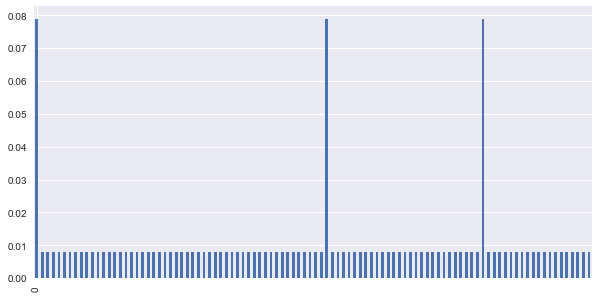

In [435]:
pd.Series(prior).plot.bar(figsize=(10,5))
plt.xticks([0])

In [442]:
p=[0.2, 0.2, 0.2, 0.2, 0.2]
color_world = ['green', 'red', 'red', 'green', 'green']
Z = 'red'
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    #
    #ADD YOUR CODE HERE
    q=[]
    for i, col in enumerate(color_world):
        if col == Z:
            q.append(p[i]*pHit)
        else:
            q.append(p[i]*pMiss)
    return q

print (sense(p,Z))

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


In [463]:
#Modify the previous code so that the robot senses red twice.



pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def sense(p, Z):
    q=[]
    for i in range(len(p)):
        hit = (Z == world[i])
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))
    for i, color in enumerate(world):
        if color == Z:
            q.append(p[i] * pHit)
        else:
            q.append(p[i] * pMiss)
    q = [i/sum(q) for i in q]
    
    return q

# def move(p, units):
#     q = []
#     for i in range(len(p)):
#         s = pExact * p[(i-units) % len(p)]
#         s = s + pOvershoot * p[(i-units-1) % len(p)]
#         s = s + pUndershoot * p[(i-units+1) % len(p)]
#         q.append(s)
#     return q

def move(location=location, distance=2, accuracy=.8):
    newlocs = np.zeros_like(location)
    miss = (1-accuracy)/2
    
    if distance >= len(location):
        distance = distance % len(location)
    
    for i in range(len(location[:-(distance+1)])):
        newlocs[i + (distance-1)] += location[i] * miss
        newlocs[i +  distance   ] += location[i] * accuracy
        newlocs[i + (distance+1)] += location[i] * miss
    
    for i in range(-(distance+1), 0, 1):
        newlocs[i + (distance-1)] += location[i] * miss
        newlocs[i +  distance   ] += location[i] * accuracy
        newlocs[i + (distance+1)] += location[i] * miss
    
    # Making sure it adds up to 1
    newlocs = [i/sum(newlocs) for i in newlocs]
    
    return newlocs


p = [0.2, 0.2, 0.2, 0.2, 0.2]
measurements = ['red', 'red', 'green']
motions = [1,1,0]
world = ['green', 'red', 'red', 'green', 'green']

for i in range(len(measurements)):
    print(p)
    print('senses', measurements[i])
    p = sense(p, measurements[i])
    print(p)
    print('moves', str(motions[i]))
    p = move(p, distance=motions[i])

print('senses green')
print(p)

[0.2, 0.2, 0.2, 0.2, 0.2]
senses red
[0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111]
moves 1
[0.11111111111111115, 0.13333333333333336, 0.31111111111111112, 0.31111111111111112, 0.13333333333333336]
senses red
[0.058823529411764719, 0.21176470588235297, 0.49411764705882349, 0.16470588235294117, 0.070588235294117646]
moves 1
[0.078823529411764709, 0.075294117647058845, 0.2247058823529412, 0.43294117647058822, 0.18823529411764703]
senses green
[0.098529411764705893, 0.031372549019607857, 0.093627450980392171, 0.54117647058823526, 0.23529411764705879]
moves 0
senses green
[0.10549019607843138, 0.04431372549019609, 0.13215686274509805, 0.46583333333333327, 0.25220588235294117]


In [497]:
coin = ['heads', 'tails']
allresults = []
for i in range(10000):
    result = []
    flip = choice(coin)
    if flip == 'tails':
        result.append('tails')
    else:
        flip = choice(coin)
        if flip == 'tails':
            result.append('heads_tails')
        else:
            result.append('heads_heads')
    allresults.append(result)

In [498]:
allresults = np.ravel(allresults)

In [499]:
pd.Series(allresults).value_counts()

tails          5003
heads_tails    2519
heads_heads    2478
dtype: int64

In [505]:
np.sum(np.array([[1,2],[3,4]]))

10

In [531]:
citizens = pd.DataFrame()

citizens['openness'] = np.random.normal(loc=50, scale=15, size=10000)
citizens['vote_old'] = np.where(citizens['openness'] < 50, 'rep', 'dem')
citizens['vote_old'] = np.where(citizens['openness'] > 100 , 'none', citizens['vote_old'])
citizens['prob_of_trying'] = citizens['openness'] * .33
citizens['roll'] = np.random.uniform(low=1, high=100, size=10000)
citizens['tried'] = np.where(citizens['roll'] < citizens['prob_of_trying'], 1, 0)
citizens['openness_new'] = citizens['openness'] + (citizens['tried'] * citizens['openness'] * .10)
citizens['openness_new'] = np.where (citizens['openness_new'] > 100, 0, citizens['openness_new'])
citizens['vote_new'] = np.where(citizens['openness_new'] < 50, 'rep', 'dem')
citizens['vote_new'] = np.where(citizens['openness_new'] == 0, 'none', citizens['vote_new'])

In [532]:
citizens.vote_old.value_counts(normalize=True)

dem     0.5043
rep     0.4953
none    0.0004
Name: vote_old, dtype: float64

In [533]:
citizens.vote_new.value_counts(normalize=True)

dem     0.5210
rep     0.4778
none    0.0012
Name: vote_new, dtype: float64

In [523]:
((citizens['openness_new']-citizens['openness'])/citizens['openness']).mean()

0.015009999999999565

Review:

- Measurement/Sensing uses multiplication
- Motion uses convolutions

- Measurement/Sensing uses Bayes Theorem
- Motion uses total probability

From last lesson: measurement meant updating our belief (and renormalizing our distribution). Motion meant keeping track of where all of our probability "went" when we moved (which meant using the law of Total Probability).



# Kalman filter & Gaussians

In [536]:
pi = np.pi
e = np.e
variance = 4
x = 8
mu = 10

a = 1/(np.sqrt(2*pi*variance))
b = e**(-0.5 * ((x - mu)**2)/variance)

b == np.exp(-.5)

def f(mu, variance, x):
    return 1/np.sqrt(2*pi*variance) * np.exp((-0.5 * (x-mu)**2) / variance)

f(10, 4, 8)

0.0087641502467842702

In [591]:
# Updating parameters

mu = 10
sigma2 = 8

nu = 13
r2 = 2

def update(mu=mu, sigma2=sigma2, nu=nu, r2=r2):
    
    prior = np.random.normal(loc=mu, scale=sigma2, size=10000)
    measurement = np.random.normal(loc=nu, scale=r2, size=10000)

    posterior_mean = ((r2 * mu) + (sigma2 * nu)) / (r2 + sigma2)

    posterior_std = 1 / ((1/r2) + (1/sigma2))
    
    return posterior_mean, posterior_std

In [592]:
update()

(12.4, 1.6)

# Motion update

new position = (mean estimate of current position) + (units moved)

New variance = (old variance) + (variance of motion)

29.9828421226 7.06466310848


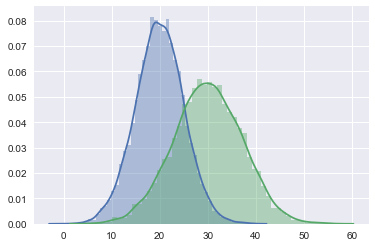

In [593]:
prior = np.random.normal(loc=20, scale=5, size=10000)
movement = np.random.normal(loc=10, scale=2, size=10000)

new_position = prior.mean() + movement.mean()
new_variance = prior.std() + movement.std()

print(new_position, new_variance)

sns.distplot(prior)

sns.distplot(np.random.normal(new_position, new_variance, size=10000))

In [24]:
import numpy as np

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return new_mean, new_var

In [25]:
# Let's see this again

def update(mu, sigma2, nu, r2):
    '''measure'''
    new_mean = ((r2 * mu) + (sigma2 * nu)) / (r2 + sigma2)

    new_var = 1 / ((1/r2) + (1/sigma2))
    
    return new_mean, new_var

In [37]:
measurements = np.array([5., 6., 7., 9., 10.])
measurements_var = 4.

motion = np.array([1., 1., 2., 1., 1.])
motion_var = 2

mu = 0
sig = 100

In [38]:
for i in range(len(measurements)):
    mu, sig = update(mu, sig, measurements[i], measurements_var)
    print('measure:', mu, sig)
    mu, sig = predict(mu, sig, motion[i], motion_var)
    print('moves then predicts:', mu, sig)
    print()

measure: 4.80769230769 3.846153846153846
moves then predicts: 5.80769230769 5.846153846153846

measure: 5.921875 2.375
moves then predicts: 6.921875 4.375

measure: 6.96268656716 2.0895522388059704
moves then predicts: 8.96268656716 4.08955223880597

measure: 8.9815498155 2.022140221402214
moves then predicts: 9.9815498155 4.022140221402214

measure: 9.99080036799 2.0055197792088317
moves then predicts: 10.990800368 4.005519779208832

